In [8]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install statsmodels
!pip install matplotlib
!pip install feature-engine
!pip install scikit-learn





[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import feature_engine
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



#### Pipeline concepts
#### Data Cleaning and Feature Engineering
#### Feature Scaling and Feature Selection
#### ML tasks and General Workflow
#### Model

##### -- Two types of estimators mainly used: Predictors and Transformers
##### --Scaling is an important preprocessing step for many machine learning algorithms. Standarization involves rescaling the features such that they have properties of a standard normal distribution with a mean of zerop and a standard deviaition of one. MAKE ALL FEATURES WITHIN A SIMILAR SCALE!!!!
#### --StandardScaler(), standarizes the data, it centers the variable at zero. It sets the variance to 1, by substracting the mean from each observation and dividing by the standard deviation, also known as the Z Score. 

In [32]:
df = sns.load_dataset('iris')
print(df.shape)
df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
pipeline = Pipeline([
    ("feature_scaling", StandardScaler())
])

In [33]:
df = df.sample(frac=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
41,4.5,2.3,1.3,0.3,setosa
96,5.7,2.9,4.2,1.3,versicolor
11,4.8,3.4,1.6,0.2,setosa
123,6.3,2.7,4.9,1.8,virginica
23,5.1,3.3,1.7,0.5,setosa


In [34]:
X_train = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']][:100]
Y_train =df[['species']][:100]
X_test = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']][100:]
Y_test =df[['species']][100:]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(100, 4) (100, 1) (50, 4) (50, 1)


In [36]:
pipeline.fit(X_train)
X_train_scaled = pipeline.transform(X_train)
X_test_scaled = pipeline.transform(X_test)

In [22]:
type(X_train_scaled)

numpy.ndarray

In [37]:
X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=X_test_scaled, columns=X_train.columns)

In [25]:
type(X_train_scaled)

pandas.core.frame.DataFrame

In [26]:
type(X_test_scaled)

pandas.core.frame.DataFrame

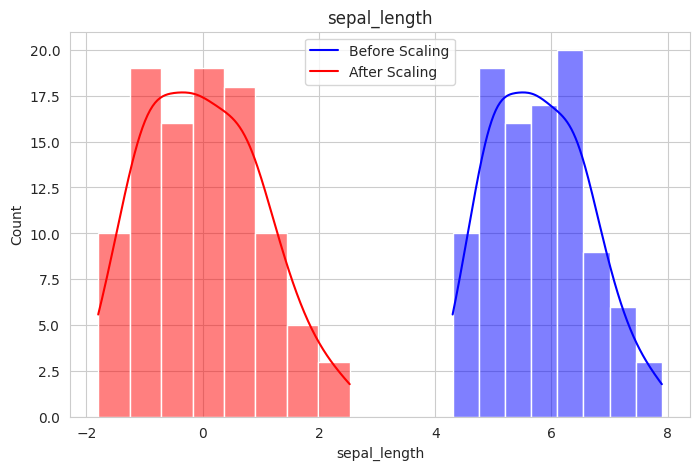

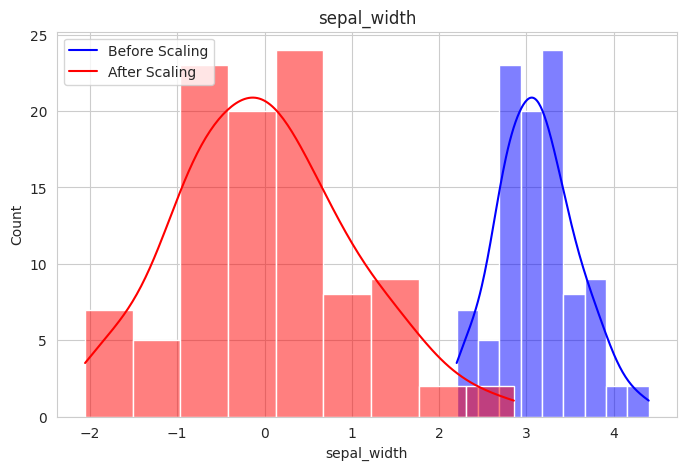

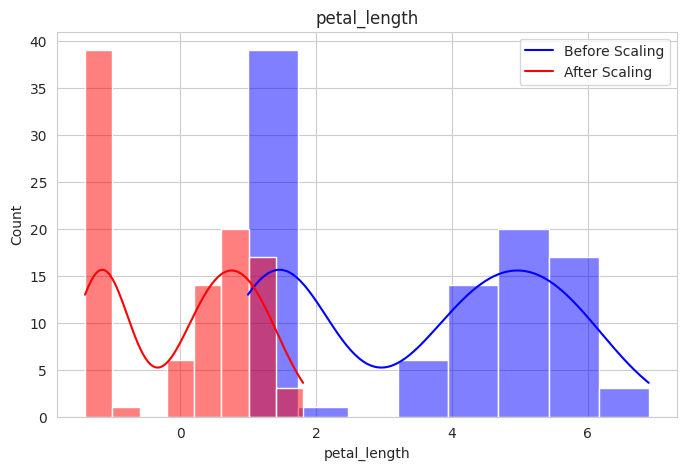

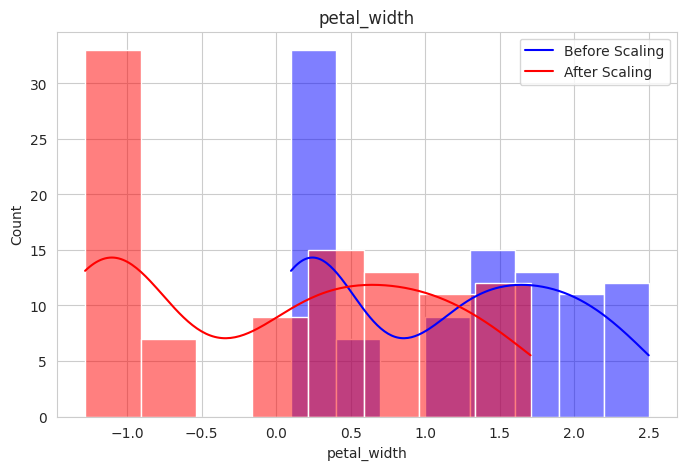

In [30]:
sns.set_style('whitegrid')
for col in X_train.columns:
    fig, axes = plt.subplots(figsize=(8,5))
    sns.histplot(data=X_train, x=col, kde=True, color='b', ax=axes)
    sns.histplot(data=X_train_scaled, x=col, kde=True, color='r', ax=axes)
    axes.set_title(f"{col}")
    axes.legend(labels=['Before Scaling', 'After Scaling'])
    plt.show

### Feature Selection ---- Select relevant features for fitting an ML model. Models with less and more relevant features are simpler to interpret,
#### Reduce chances of overfitting by removing features that may add little info or noise
#### Reduce time needed to train models
#### Reduce feature space when designing or implementing API or Dashboard

### Feature Selection Method: -Filter Method -Wrapper Method -Embedded Method

#### Embedded Method ---- It performs feature selection during the model training. It finds the feature subset for the algorightm that is being trained. It automatically trains an ML model, then derives feature importances from it, removing non-relevant features using the derived feature importance. 

In [38]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X_train.head()

(100, 4) (100, 1) (50, 4) (50, 1)


,sepal_length,sepal_width,petal_length,petal_width
41,4.5,2.3,1.3,0.3
96,5.7,2.9,4.2,1.3
11,4.8,3.4,1.6,0.2
123,6.3,2.7,4.9,1.8
23,5.1,3.3,1.7,0.5


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
pipeline = Pipeline([
    ("feature_scaling", StandardScaler()),
    ("feature_selection", SelectFromModel(DecisionTreeClassifier(random_state=101))),
    ("model", DecisionTreeClassifier(random_state=101)),
])

pipeline

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=DecisionTreeClassifier(random_state=101))),
                ('model', DecisionTreeClassifier(random_state=101))])